# Project - Electricity Demand Forecasting

In [5]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [6]:
# import the dataset

data = pd.read_csv("Electricity+Demand+Dataset.csv")

In [7]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [8]:
# Check some basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [9]:
# Convert the 'Timestamp' column datatype to datetime format

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [10]:
# Check some basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


In [11]:
# Set the 'Timestamp' column as DataFrame's index

data = data.set_index('Timestamp')

In [12]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [13]:
# Using Describe function to check the summary statistics

data[['Temperature', 'Humidity', 'Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [14]:
# Check for Missing Values

data.isnull().sum()

hour           11
dayofweek       9
month           8
year            5
dayofyear       5
Temperature     7
Humidity       10
Demand          7
dtype: int64

In [15]:
# Drop those rows that contain All missing values

data = data.dropna(how = 'all')
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [16]:
# To show the records that contain All null values

data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [17]:
# Check for Missing Values

data.isnull().sum()

hour           7
dayofweek      5
month          4
year           1
dayofyear      1
Temperature    3
Humidity       6
Demand         3
dtype: int64

In [18]:
# Applying 'ffill' method on columns

data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()

In [19]:
# Applying 'bfill' method on columns

data[['Temperature', 'Humidity']] = data[['Temperature', 'Humidity']].bfill()

In [20]:
# Applying 'interpolate' method on columns

data['Demand'] = data['Demand'].interpolate(method = 'time')

In [21]:
# Check for Missing Values

data.isnull().sum()

hour           0
dayofweek      0
month          0
year           0
dayofyear      0
Temperature    0
Humidity       0
Demand         0
dtype: int64

In [22]:
# Shape of dataframe

data.shape

(43844, 8)

In [23]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [24]:
# Create the 'Quarter' column at 5th index in the dataset

data.insert(5, 'quarter', data.index.quarter)

In [25]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [26]:
# Check some basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  float64
 1   dayofweek    43844 non-null  float64
 2   month        43844 non-null  float64
 3   year         43844 non-null  float64
 4   dayofyear    43844 non-null  float64
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.2 MB


In [27]:
# Convert the datatype from float to integer of columns

data[['hour', 'dayofweek', 'month','year', 'dayofyear']] = data[['hour', 'dayofweek', 'month','year', 'dayofyear']].astype(int)

In [28]:
# Check some basic information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int64  
 1   dayofweek    43844 non-null  int64  
 2   month        43844 non-null  int64  
 3   year         43844 non-null  int64  
 4   dayofyear    43844 non-null  int64  
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 3.2 MB


In [29]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,4,3.000000,40.565916,4015.979957


In [30]:
# Create the 'Week of Year' column at 5th index in the dataset

data.insert(5, 'weekofyear', data.index.isocalendar().week.astype(int))

In [31]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [32]:
# to show the bottom records of the dataframe

data.tail(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2024-12-29,22,6,12,2024,364,52,4,3.000000,70.021729,2929.747277
2024-12-29,23,6,12,2024,364,52,4,3.000000,52.836009,2668.369837
2024-12-30,0,0,12,2024,365,1,4,3.000000,65.892957,2699.075526
2024-12-30,1,0,12,2024,365,1,4,3.000000,72.128006,2644.045970
2024-12-30,2,0,12,2024,365,1,4,3.000000,68.631804,2206.527443
2024-12-30,3,0,12,2024,365,1,4,5.018972,78.981498,2414.881030
2024-12-30,4,0,12,2024,365,1,4,3.000000,70.592472,2473.705275
2024-12-30,5,0,12,2024,365,1,4,7.835546,74.624102,3291.585334
2024-12-30,6,0,12,2024,365,1,4,11.118482,68.974585,4120.280932


In [33]:
# Create a new column at 7th index to check the Weekend

data.insert(7, 'is_weekend', data.index.dayofweek.isin([5,6]))

In [34]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,False,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,False,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,False,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,False,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,False,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,False,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,False,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,False,3.000000,40.565916,4015.979957


In [35]:
# Convert the datatype from float to integer of the column

data['is_weekend'] = data['is_weekend'].astype(int)

In [36]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957


In [37]:
# filtering the dataframe to get all records/rows where we have weekend

data[data['is_weekend'] == 1]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-04,0,5,1,2020,4,1,1,1,3.000000,60.955363,2067.352696
2020-01-04,1,5,1,2020,4,1,1,1,3.000000,66.494073,2138.504702
2020-01-04,2,5,1,2020,4,1,1,1,3.000000,56.398199,1880.418696
2020-01-04,3,5,1,2020,4,1,1,1,4.474526,60.603500,2005.823854
2020-01-04,4,5,1,2020,4,1,1,1,7.738184,65.808825,2203.720413
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,19,6,12,2024,364,52,4,1,7.077721,46.341323,4304.049396
2024-12-29,20,6,12,2024,364,52,4,1,3.000000,69.641621,4146.583958
2024-12-29,21,6,12,2024,364,52,4,1,3.723222,46.751731,3366.641206


In [38]:
# Lagged Features: These are the past values of a time series data.

# Use - Past demand values are strong predictors. They can be used as input to predict future values.

In [39]:
# Create a new column that will contain Demand from the same hour yesterday

data['Demand_lag_24hr'] = data['Demand'].shift(24)

In [40]:
# Create a new column that will contain Demand from the same hour last week

data['demand_lag_168hr'] = data['Demand'].shift(168) # 24x7 = 168 hours for weekly shift

In [41]:
# show top rows of the dataframe

data.head(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN


In [42]:
# using iloc function for the slicing of dataframe' rows

data.iloc[160:200]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr
Timestamp,,,,,,,,,,,,,
2020-01-07,16,1,1,2020,7,2,1,0,14.016616,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,7,2,1,0,6.736632,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,7,2,1,0,17.782435,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,7,2,1,0,3.000000,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,7,2,1,0,7.116704,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,7,2,1,0,5.158936,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,7,2,1,0,3.000000,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,7,2,1,0,3.000000,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872


In [43]:
# Create a new column that will contain Rolling Mean of the Demand in last 24 hours

data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()

In [44]:
# Create a new column that will contain Rolling Standard Deviation of the Demand in last 24 hours

data['demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()

In [45]:
# show top rows of the dataframe

data.head(27)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [46]:
# Drop all Rows having null values

data = data.dropna()
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


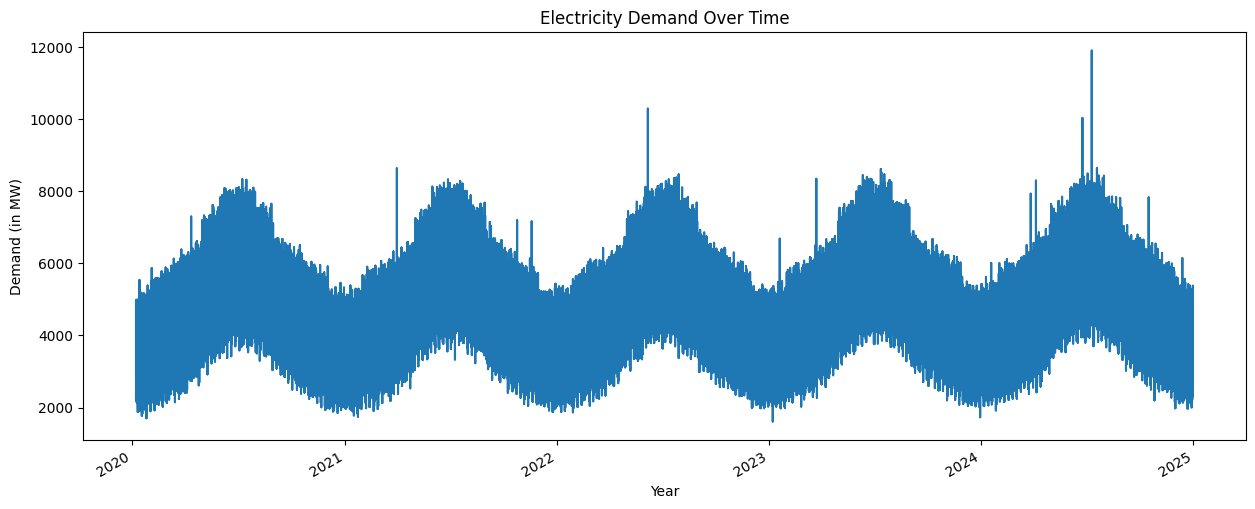

In [47]:
# Plot raw demand over time

data['Demand'].plot(figsize =(15,6), title = "Electricity Demand Over Time")
plt.xlabel("Year")                          # naming for x-axis
plt.ylabel("Demand (in MW)")                # naming for y-axis  
                   
plt.show()

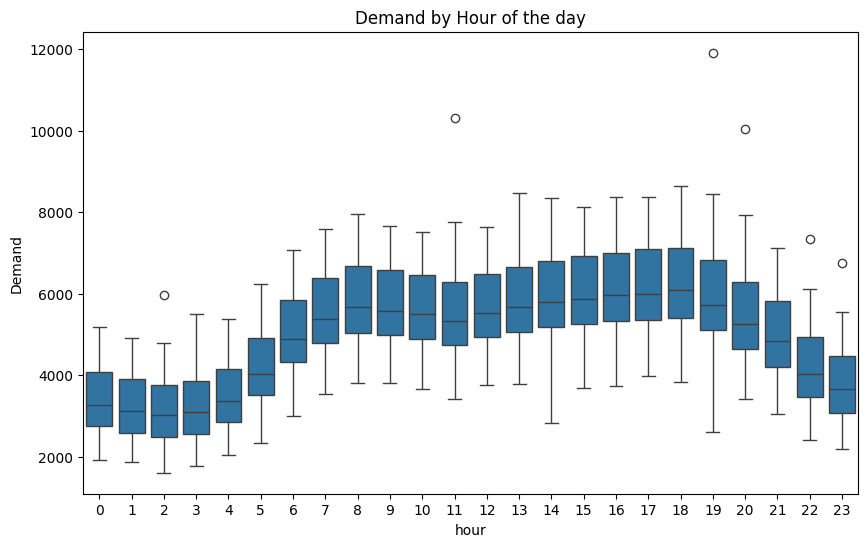

In [48]:
# Visualize demand by hour of day, using boxplot

plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = 'hour', y = 'Demand')
plt.title("Demand by Hour of the day");

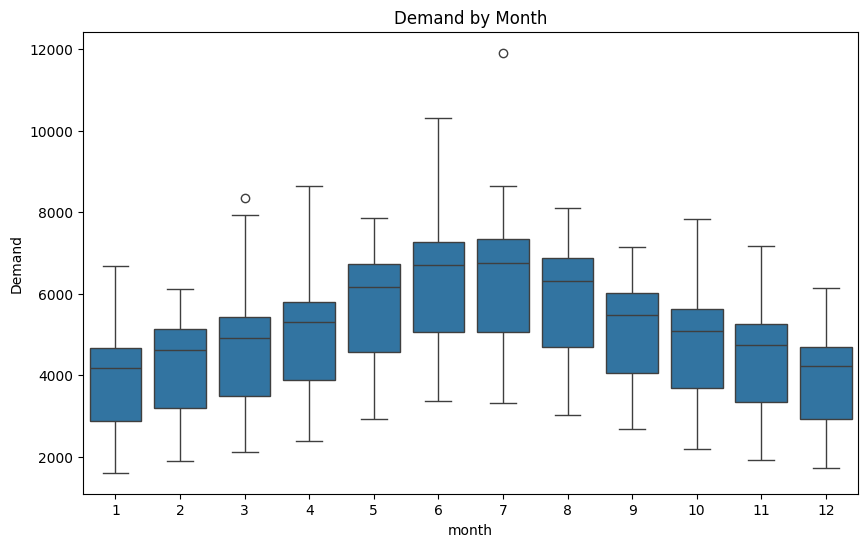

In [49]:
# Visualize demand by month, using boxplot

plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'month', y = 'Demand')
plt.title("Demand by Month")
plt.show()

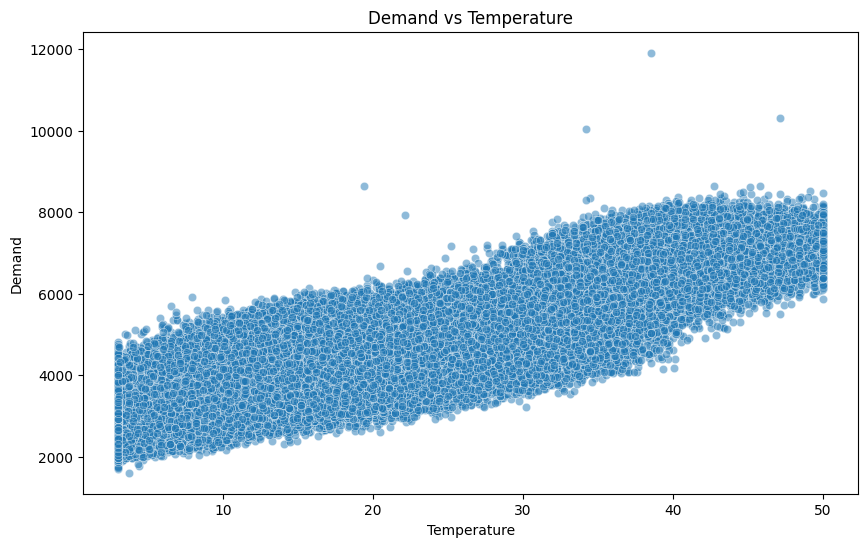

In [50]:
# Scatter plot of Demand vs. Temperature

plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x = 'Temperature', y = 'Demand', alpha = 0.5)  #alpha - to adjust the tranparency of points
plt.title("Demand vs Temperature")
plt.show()

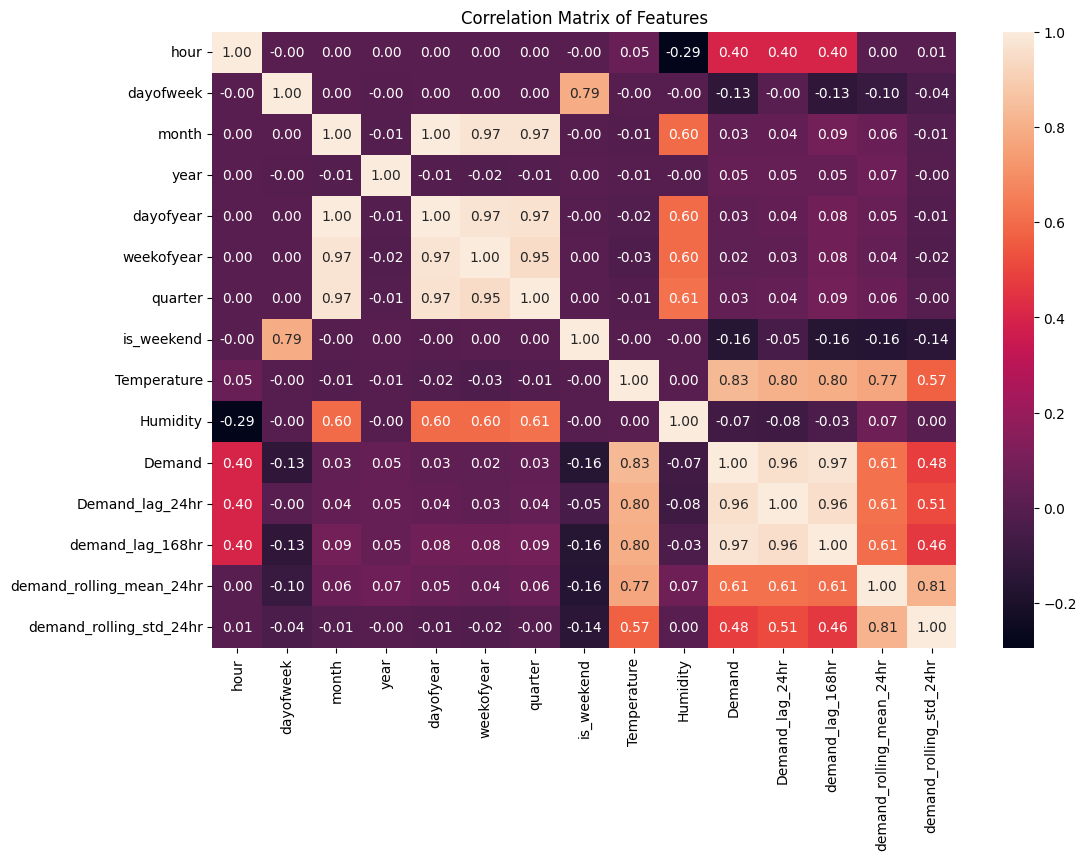

In [51]:
# Correlation Matrix and Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt=".2f") # anoot=True : to show the numbers , fmt : to adjust decimals
plt.title("Correlation Matrix of Features")
plt.show()

In [52]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [53]:
# Defining Target Variable (Y)

Y = data.Demand                         # target variable / dependent variable

In [54]:
# Defining Features (X)

X = data.drop('Demand', axis=1)         # independent variables / features / predictors

In [55]:
print(Y)           # Target variable

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 43676, dtype: float64


In [56]:
X                    # Features

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [57]:
# Splitting the data into Training and Testing data

X_train = X.loc[ : '2023-12-31']                  # taking 80% of data as training data

In [58]:
X_train                                           # 80% of the training features data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,52,4,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,52,4,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,52,4,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [59]:
Y_train = Y.loc[ : '2023-12-31' ]             # taking 80% of data as training data

In [60]:
Y_train                                       # 80% of the training target variable

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2023-12-31    4185.721624
2023-12-31    3829.359810
2023-12-31    3416.409325
2023-12-31    3188.143951
2023-12-31    2631.860751
Name: Demand, Length: 34892, dtype: float64

In [61]:
X_test = X.loc[ '2024-01-01' : ]               # taking 20% of data as testing data

In [62]:
X_test                                         # 20% of the training features data  

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [63]:
Y_test = Y.loc[ '2024-01-01' : ]                       # taking 20% of data as testing data

In [64]:
Y_test                                                 # 20% of the testing target variable

Timestamp
2024-01-01    2720.606072
2024-01-01    2669.647167
2024-01-01    2435.578924
2024-01-01    2641.043699
2024-01-01    2687.949643
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 8784, dtype: float64

In [65]:
print(X_train.shape)                   
print(Y_train.shape)

(34892, 14)
(34892,)


In [66]:
print(X_test.shape)
print(Y_test.shape)

(8784, 14)
(8784,)


# XGBoost

XGBoost is a powerful algorithm for time-series forecasting, as it can handle non-linear data easily.

It can handle seasonality and trends in time-series data effectively.

In [67]:
from xgboost import XGBRegressor     # from XGBoost library we are importing XGBRegressor class

# from sklearn library importing two fundamental metrics to evaluate the performance of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# from model_selection module of scikit-learn's library, import TimeSeriesSplit class
# TimeSeriesSplit class performs appropriate cross-validation when dealing with time series data
from sklearn.model_selection import TimeSeriesSplit

In [68]:
# Initialize and train the model

model_xgb = XGBRegressor(n_estimators = 1000,                
                         early_stopping_rounds = 50,
                         learning_rate = 0.01,
                         random_state = 42,
                         objective = 'reg:squarederror' )

In short :

The XGBRegressor initialization creates a model that will train for up to 1000 boosting rounds (trees) but will stop early if performance on a validation set doesn't improve for 50 consecutive rounds. 

Each tree's contribution is scaled down by a learning rate of 0.01 to prevent overfitting. 

This model is designed to minimize the squared error for regression tasks. 

In [69]:
# training the model

model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = False)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [70]:
# Make predictions

predictions_xgb = model_xgb.predict(X_test)

In [71]:
# Evaluating the model

rmse_xgb = np.sqrt(mean_squared_error(Y_test, predictions_xgb))

mae_xgb = mean_absolute_error(Y_test, predictions_xgb )

In [72]:
print('XGBoost RMSE:',  rmse_xgb)
print('XGBoost MAE:' ,  mae_xgb)

XGBoost RMSE: 175.07965552482665
XGBoost MAE: 123.32653722857253


In [73]:
# print a few predictions
print("\nSample Predicitions:")
for i in range(5):
    print(f"Actual: {Y_test.iloc[i]}, Predicted: {predictions_xgb[i]}")


Sample Predicitions:
Actual: 2720.606072, Predicted: 2671.82470703125
Actual: 2669.647167, Predicted: 2496.2666015625
Actual: 2435.578924, Predicted: 2401.541015625
Actual: 2641.043699, Predicted: 2598.23974609375
Actual: 2687.949643, Predicted: 2578.518798828125


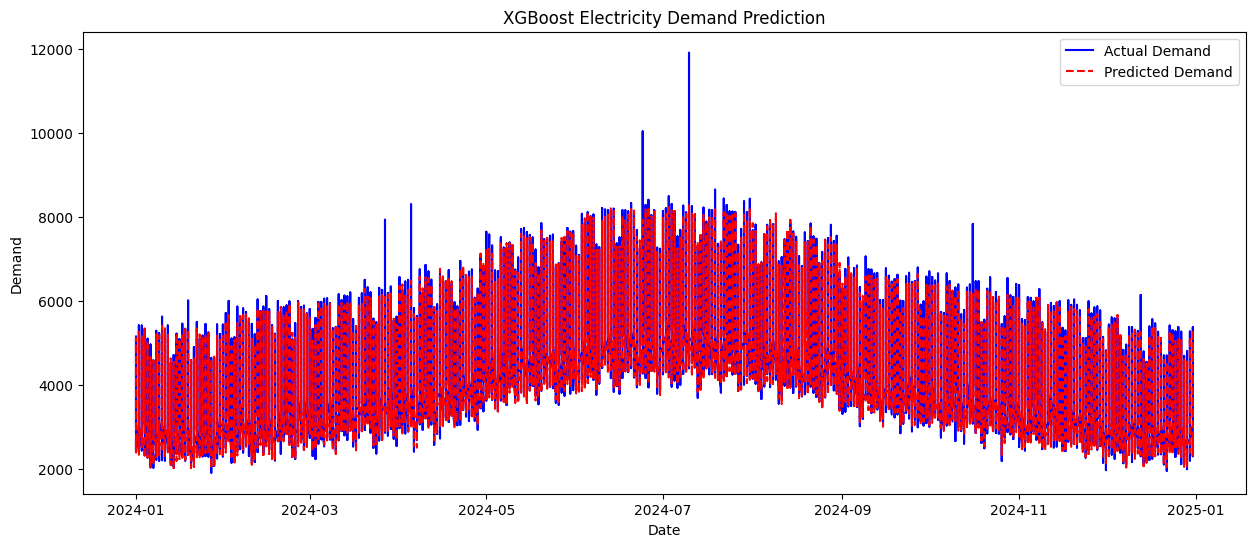

In [74]:
# Visulaize the Predictions

plt.figure(figsize = (15,6))
plt.plot(Y_test.index, Y_test, label = 'Actual Demand', color = 'Blue')
plt.plot(Y_test.index, predictions_xgb, label = 'Predicted Demand', color = 'Red', linestyle='--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()

plt.show()

In [75]:
# save the model

import joblib

joblib.dump(model_xgb, 'electicity_xgb_prediction_model.pkl')

['electicity_xgb_prediction_model.pkl']

In [76]:
# load and Use:

loaded_model = joblib.load('electicity_xgb_prediction_model.pkl')

future_predictions = loaded_model.predict(X_test[:5])
print("\nFuture-like Predictions:", future_predictions)


Future-like Predictions: [2671.8247 2496.2666 2401.541  2598.2397 2578.5188]


In [77]:
loaded_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


------